# Audio Data Science - HiveFive

# 1. Preprocessing

## 1.1 Exploration

In [1]:
import os
import shap
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append("D:\\Software-Projekte\\Uni\\ds_audio\\src\\")
import config

metadata_column_names = ['device', 'hive number', 'date', 'hive temp', 'hive humidity',
'hive pressure', 'weather temp', 'weather humidity', 'weather pressure',
'wind speed', 'gust speed', 'weatherID', 'cloud coverage', 'rain',
'lat', 'long', 'file name', 'queen presence', 'queen acceptance',
'frames', 'target', 'time', 'queen status']

metadata = np.load(os.path.join(config.TARGET_DIR, "bee_hive_metadata.npy"), allow_pickle=True)
metadata_df = pd.DataFrame(metadata, columns=metadata_column_names)
mel_specs = np.load(os.path.join(config.TARGET_DIR, "bee_hive_mel_specs.npy"), allow_pickle=True)

In [ ]:
mel_specs.shape

(6, 128, 5168)

In [ ]:
metadata_df.shape

(6, 23)

In [ ]:
metadata_df.head()

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,...,rain,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status
0,2,3,2022-06-05 18:40:08,28.14,44.7,1007.48,23.02,71,1013,7.2,...,0,37.29,-121.95,2022-06-05--18-40-08_2__segment4.wav,1,2,10,5,0.75,0
1,2,3,2022-06-06 17:22:09,27.22,32.43,1007.19,24.65,40,1013,6.69,...,0,37.29,-121.95,2022-06-06--17-22-09_2__segment5.wav,1,2,10,5,0.708,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,...,0,37.29,-121.95,2022-06-08--17-21-53_1__segment2.wav,0,0,8,1,0.708,1
3,1,5,2022-06-11 3:36:48,20.71,62.03,1008.18,17.32,75,1014,0.45,...,0,37.29,-121.95,2022-06-11--03-36-48_1__segment3.wav,1,1,8,2,0.125,2
4,2,1,2022-06-15 5:32:54,18.69,26.58,1006.34,13.07,77,1012,2.06,...,0,37.29,-121.95,2022-06-15--05-32-54_2__segment5.wav,1,2,10,5,0.208,0


In [ ]:
mel_specs[0]

array([[-14.9545765, -11.246313 ,  -9.358313 , ..., -11.164417 ,
        -13.963354 , -19.050125 ],
       [-17.12273  , -11.562212 ,  -8.4893875, ..., -11.340708 ,
        -13.50976  , -17.01359  ],
       [-18.74385  , -17.900719 , -19.085217 , ..., -23.340462 ,
        -24.677061 , -24.827282 ],
       ...,
       [-60.933784 , -62.31993  , -66.98036  , ..., -80.       ,
        -80.       , -78.02534  ],
       [-61.016495 , -62.402504 , -67.06277  , ..., -80.       ,
        -80.       , -78.14955  ],
       [-61.06923  , -62.45517  , -67.115326 , ..., -80.       ,
        -80.       , -78.227585 ]], dtype=float32)

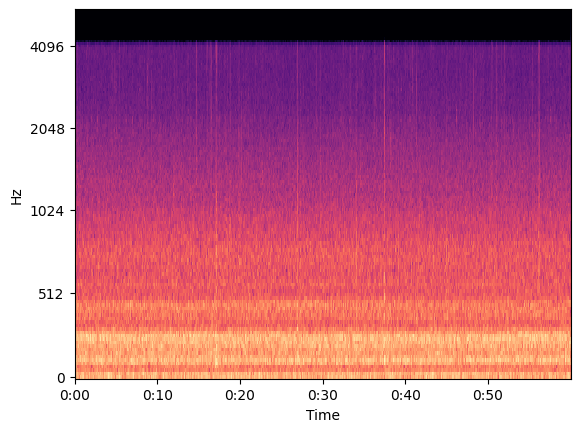

In [ ]:
import librosa.display

librosa.display.specshow(mel_specs[0], x_axis='time', y_axis='mel', hop_length=256, fmax=11025/2)

In [ ]:
librosa.get_duration(y=mel_specs[2])

0.2343764172335601

In [2]:
path_data = "../data/"
filename = "all_data_updated.csv"
data = pd.read_csv(os.path.join(path_data, filename))

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,weatherID,cloud coverage,rain,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status
0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,1013,8.75,NaN,711,75,0,37.29,-121.95,2022-06-08--14-52-28_1.raw,1,2,8,0,0.583,0
1,1,5,2022-06-08 15:51:41,33.56,33.98,1006.93,25.99,53,1012,10.29,NaN,803,75,0,37.29,-121.95,2022-06-08--15-51-41_1.raw,1,2,8,0,0.625,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,NaN,803,75,0,37.29,-121.95,2022-06-08--17-21-53_1.raw,0,0,8,1,0.708,1
3,1,5,2022-06-08 18:20:59,30.51,36.74,1006.68,22.97,59,1012,8.23,10.29,803,75,0,37.29,-121.95,2022-06-08--18-20-59_1.raw,0,0,8,1,0.750,1
4,1,5,2022-06-08 19:20:04,30.32,35.55,1006.58,21.52,61,1012,7.20,NaN,803,75,0,37.29,-121.95,2022-06-08--19-20-04_1.raw,0,0,8,1,0.792,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device            1275 non-null   int64  
 1   hive number       1275 non-null   int64  
 2   date              1275 non-null   object 
 3   hive temp         1275 non-null   float64
 4   hive humidity     1275 non-null   float64
 5   hive pressure     1275 non-null   float64
 6   weather temp      1271 non-null   float64
 7   weather humidity  1275 non-null   int64  
 8   weather pressure  1275 non-null   int64  
 9   wind speed        1271 non-null   float64
 10  gust speed        281 non-null    float64
 11  weatherID         1275 non-null   int64  
 12  cloud coverage    1275 non-null   int64  
 13  rain              1275 non-null   int64  
 14  lat               1271 non-null   float64
 15  long              1271 non-null   float64
 16  file name         1275 non-null   object 


In [5]:
data.describe()

,device,hive number,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,weatherID,cloud coverage,rain,lat,long,queen presence,queen acceptance,frames,target,time,queen status
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1271.000000,1275.000000,1275.000000,1271.000000,281.000000,1275.000000,1275.000000,1275.0,1.271000e+03,1.271000e+03,1275.000000,1275.000000,1275.00000,1275.000000,1275.000000,1275.000000
mean,1.554510,2.709020,29.009475,44.663890,1009.179169,20.326845,63.501176,1011.370196,3.805452,4.511317,795.941176,27.868235,0.0,3.729000e+01,-1.219500e+02,0.876078,1.549020,9.10902,3.396863,0.482972,2.127843
std,0.497215,1.488587,8.172418,18.359731,2.406004,5.587868,16.207222,56.807873,2.311196,3.931787,47.263969,33.641333,0.0,7.108224e-13,5.686579e-14,0.329621,0.704151,0.99443,1.586142,0.287396,1.096649
min,1.000000,1.000000,15.500000,7.230000,1003.540000,10.750000,0.000000,0.000000,0.000000,0.450000,0.000000,0.000000,0.0,3.729000e+01,-1.219500e+02,0.000000,0.000000,8.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,22.455000,32.245000,1007.375000,15.480000,51.000000,1013.000000,2.060000,1.340000,800.000000,0.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,1.000000,8.00000,3.000000,0.250000,1.000000
50%,2.000000,3.000000,27.910000,42.180000,1009.170000,19.280000,66.000000,1014.000000,3.600000,2.680000,801.000000,20.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,2.000000,10.00000,3.000000,0.500000,3.000000
75%,2.000000,4.000000,33.075000,54.945000,1010.705000,24.850000,78.000000,1016.000000,5.660000,7.600000,802.000000,40.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,2.000000,10.00000,5.000000,0.750000,3.000000
max,2.000000,5.000000,55.620000,93.470000,1015.970000,35.430000,88.000000,1021.000000,10.800000,15.430000,804.000000,100.000000,0.0,3.729000e+01,-1.219500e+02,1.000000,2.000000,10.00000,5.000000,0.958000,3.000000


In [6]:
# reset option for displaying columns
pd.reset_option('display.max_columns')

array([[<Axes: title={'center': 'device'}>,
        <Axes: title={'center': 'hive number'}>,
        <Axes: title={'center': 'hive temp'}>,
        <Axes: title={'center': 'hive humidity'}>,
        <Axes: title={'center': 'hive pressure'}>],
       [<Axes: title={'center': 'weather temp'}>,
        <Axes: title={'center': 'weather humidity'}>,
        <Axes: title={'center': 'weather pressure'}>,
        <Axes: title={'center': 'wind speed'}>,
        <Axes: title={'center': 'gust speed'}>],
       [<Axes: title={'center': 'weatherID'}>,
        <Axes: title={'center': 'cloud coverage'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'queen presence'}>,
        <Axes: title={'center': 'queen acceptance'}>,
        <Axes: title={'center': 'frames'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'queen s

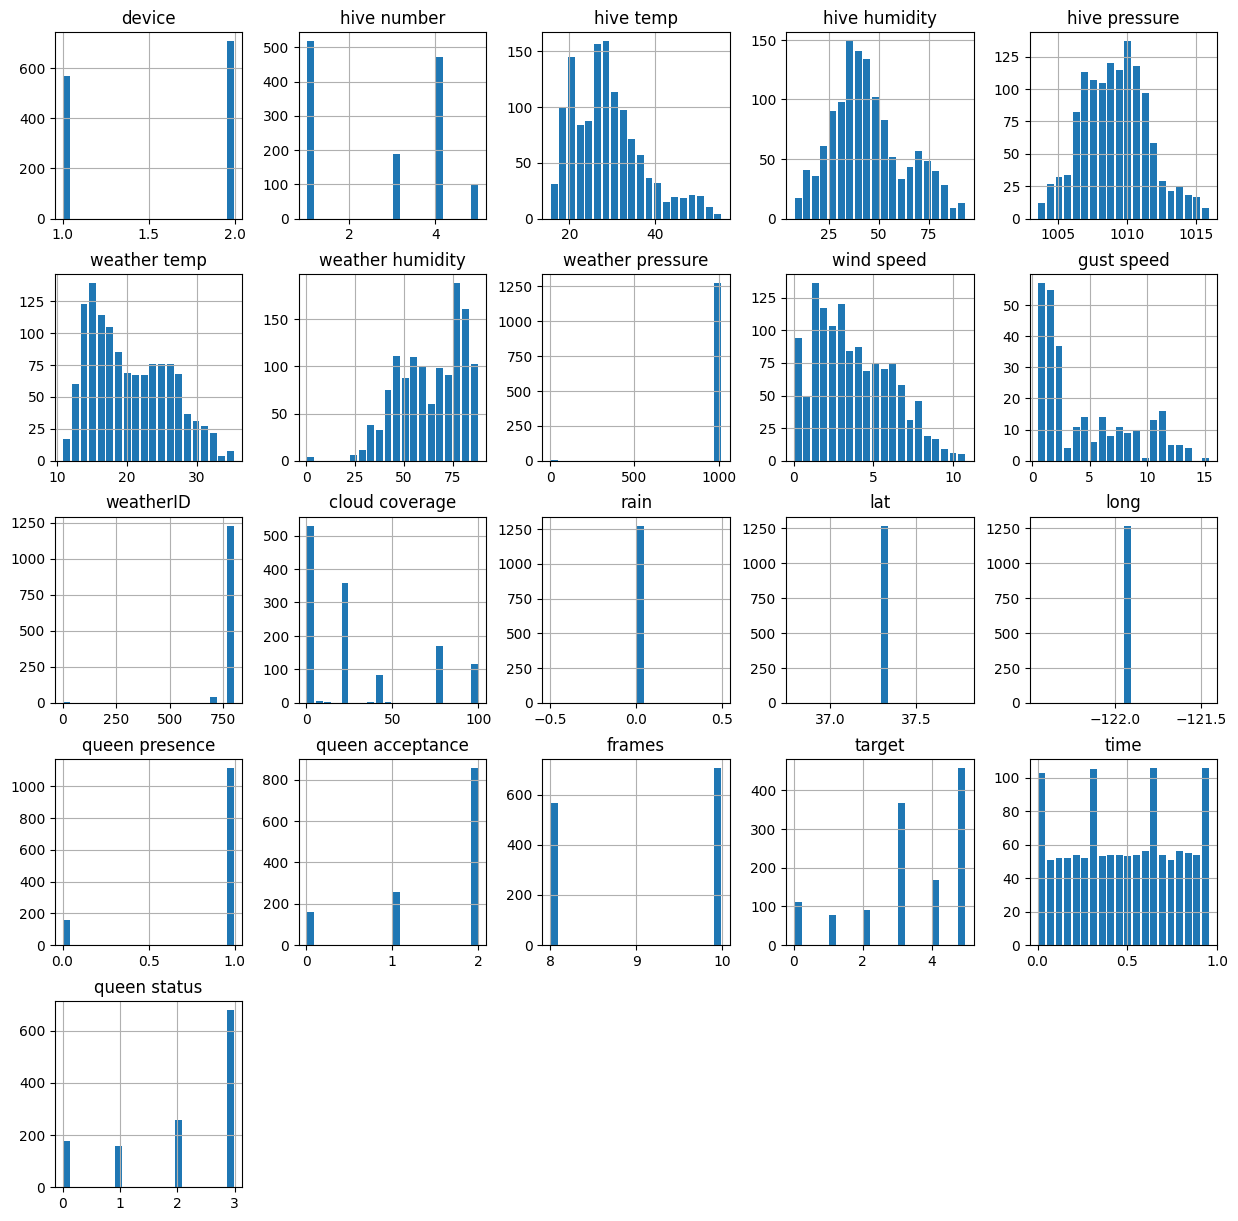

In [7]:
data.hist(figsize=(15,15), bins=20, rwidth=0.8)

### Erkenntnisse
- Bei den Features "Weather Humidity", "Weather Pressure" & "Weather ID" ist der min-Wert 0, hier kann es sein dass die Daten teilweise ungültig sind & bereinigt werden müssen(?)
- Feature "long" (Longitute) ist für alle Daten gleich und kann deshalb entfernt/vernachlässigt werden
- Feature "gust speed" ist nur für einen kleinen Teil der Daten (281 Datenpunkte) angegeben und sollte deshalb für die Analyse vernachlässigt werden
- Features "Queen Presence" & "Queen status" haben einen starken Bias und müssen ggf. angepasst werden (Oversampling etc.)
- Features "date" und "file name" liegen als Datentyp "Object" vor und sollten entsprechend umgewandelt werden

## 1.2 Bereinigung

Entfernen der Features "Gust speed" & "long" und Einträgen mit Null-Werten (4 Stk.)

In [8]:
data_cleaned = data.drop(columns=["gust speed", "long"])
data_cleaned = data_cleaned.dropna()

In [9]:
data_cleaned.shape

(1271, 21)

In [10]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device            1271 non-null   int64  
 1   hive number       1271 non-null   int64  
 2   date              1271 non-null   object 
 3   hive temp         1271 non-null   float64
 4   hive humidity     1271 non-null   float64
 5   hive pressure     1271 non-null   float64
 6   weather temp      1271 non-null   float64
 7   weather humidity  1271 non-null   int64  
 8   weather pressure  1271 non-null   int64  
 9   wind speed        1271 non-null   float64
 10  weatherID         1271 non-null   int64  
 11  cloud coverage    1271 non-null   int64  
 12  rain              1271 non-null   int64  
 13  lat               1271 non-null   float64
 14  file name         1271 non-null   object 
 15  queen presence    1271 non-null   int64  
 16  queen acceptance  1271 non-null   int64  
 17  

In [11]:
data_cleaned.head()

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,...,cloud coverage,rain,lat,file name,queen presence,queen acceptance,frames,target,time,queen status
0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,1013,8.75,...,75,0,37.29,2022-06-08--14-52-28_1.raw,1,2,8,0,0.583,0
1,1,5,2022-06-08 15:51:41,33.56,33.98,1006.93,25.99,53,1012,10.29,...,75,0,37.29,2022-06-08--15-51-41_1.raw,1,2,8,0,0.625,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,...,75,0,37.29,2022-06-08--17-21-53_1.raw,0,0,8,1,0.708,1
3,1,5,2022-06-08 18:20:59,30.51,36.74,1006.68,22.97,59,1012,8.23,...,75,0,37.29,2022-06-08--18-20-59_1.raw,0,0,8,1,0.750,1
4,1,5,2022-06-08 19:20:04,30.32,35.55,1006.58,21.52,61,1012,7.20,...,75,0,37.29,2022-06-08--19-20-04_1.raw,0,0,8,1,0.792,1


Umwandeln der Datentypen

In [12]:
data_cleaned["date"] = pd.to_datetime(data_cleaned["date"], format = '%Y-%m-%d %H:%M:%S')
data_cleaned["file name"] = data_cleaned["file name"].astype("string")


In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   device            1271 non-null   int64         
 1   hive number       1271 non-null   int64         
 2   date              1271 non-null   datetime64[ns]
 3   hive temp         1271 non-null   float64       
 4   hive humidity     1271 non-null   float64       
 5   hive pressure     1271 non-null   float64       
 6   weather temp      1271 non-null   float64       
 7   weather humidity  1271 non-null   int64         
 8   weather pressure  1271 non-null   int64         
 9   wind speed        1271 non-null   float64       
 10  weatherID         1271 non-null   int64         
 11  cloud coverage    1271 non-null   int64         
 12  rain              1271 non-null   int64         
 13  lat               1271 non-null   float64       
 14  file name         1271 non-nu

## Compute spectrograms from audio

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [2]:
sample_audio_files_path = librosa.util.find_files("../data/raw")
sample_audio_files = []

for file in sample_audio_files_path:
    audio_time_series, sample_rate = librosa.load(file)
    sample_audio_files.append({'y': audio_time_series, 'sr': sample_rate})

In [3]:
sample_audio_files[1]['y']

array([-0.07500582, -0.07904625, -0.05669894, ..., -0.02445977,
       -0.0243671 , -0.01461641], dtype=float32)

In [15]:
sample_audio_files[1]['y'].shape

(1323000,)

In [8]:
librosa.get_samplerate(sample_audio_files_path[0])

22050

In [13]:
test = librosa.resample(sample_audio_files[0]['y'], orig_sr=sample_audio_files[0]['sr'], target_sr=11025)
test.shape

(661500,)

In [19]:
sr = 11025

melsp = librosa.feature.melspectrogram(y=test, sr=sr, n_fft=2048, hop_length=256, n_mels=128, fmax=int(sr/2))
melsp = librosa.power_to_db(melsp, ref=np.max)
melsp.shape

(128, 2584)

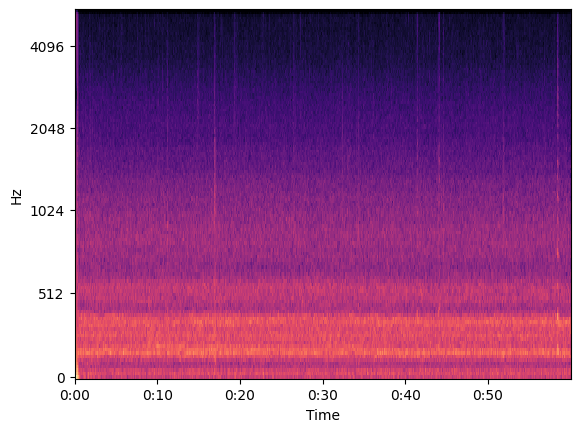

In [18]:
librosa.display.specshow(melsp, x_axis='time', y_axis='mel', sr=sr, hop_length=256, fmax=int(sr/2))

In [25]:
from presets import Preset
import librosa as _librosa

librosa = Preset(_librosa)
librosa['sr']=11025

In [26]:
sample_audio_files_path = librosa.util.find_files("../data/raw")
sample_audio_files = []

for file in sample_audio_files_path:
    audio_time_series, sample_rate = librosa.load(file, sr=None)
    sample_audio_files.append({'y': audio_time_series, 'sr': sample_rate})

In [27]:
sample_rate

22050

In [23]:
y = sample_audio_files[0]['y']
sr = sample_audio_files[0]['sr']

melsp = librosa.feature.melspectrogram(y=y, n_fft=2048, hop_length=256, n_mels=128, fmax=int(11025/2))
melsp = librosa.power_to_db(melsp, ref=np.max)

In [24]:
melsp.shape

(128, 5168)

In [99]:
melsp.min(), melsp.max()

(-80.0, 0.0)

In [100]:
melsp = librosa.util.normalize(melsp, axis=1)

In [101]:
melsp.min(), melsp.max()

(-1.0, 0.0)

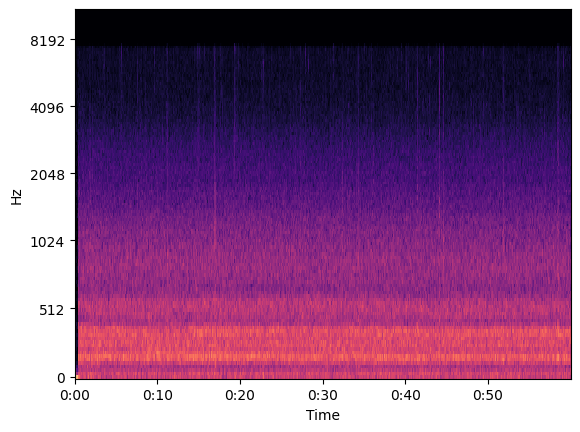

In [102]:
librosa.display.specshow(melsp, x_axis='time', y_axis='mel', sr=sr, hop_length=256, fmax=int(sr/2))

In [92]:
melsp[127].max()

-1.0

In [95]:
for i in range(0, 127):
    print(f'row {127-i}: {melsp[127-i].max()}')

row 127: -1.0
row 126: -1.0
row 125: -1.0
row 124: -1.0
row 123: -1.0
row 122: -1.0
row 121: -1.0
row 120: -1.0
row 119: -1.0
row 118: -1.0
row 117: -1.0
row 116: -1.0
row 115: -1.0
row 114: -1.0
row 113: -1.0
row 112: -1.0
row 111: -1.0
row 110: -1.0
row 109: -1.0
row 108: -1.0
row 107: -1.0
row 106: -1.0
row 105: -1.0
row 104: -1.0
row 103: -1.0
row 102: -1.0
row 101: -1.0
row 100: -1.0
row 99: -1.0
row 98: -1.0
row 97: -1.0
row 96: -0.7928841710090637
row 95: -0.5820954442024231
row 94: -0.4943087697029114
row 93: -0.4732043743133545
row 92: -0.47247132658958435
row 91: -0.4747792184352875
row 90: -0.47666415572166443
row 89: -0.4792414605617523
row 88: -0.4824138581752777
row 87: -0.48610228300094604
row 86: -0.4892844259738922
row 85: -0.49079379439353943
row 84: -0.4956175684928894
row 83: -0.5004400014877319
row 82: -0.5052804350852966
row 81: -0.5099443197250366
row 80: -0.5148089528083801
row 79: -0.5205905437469482
row 78: -0.5261059403419495
row 77: -0.5326401591300964
row 7

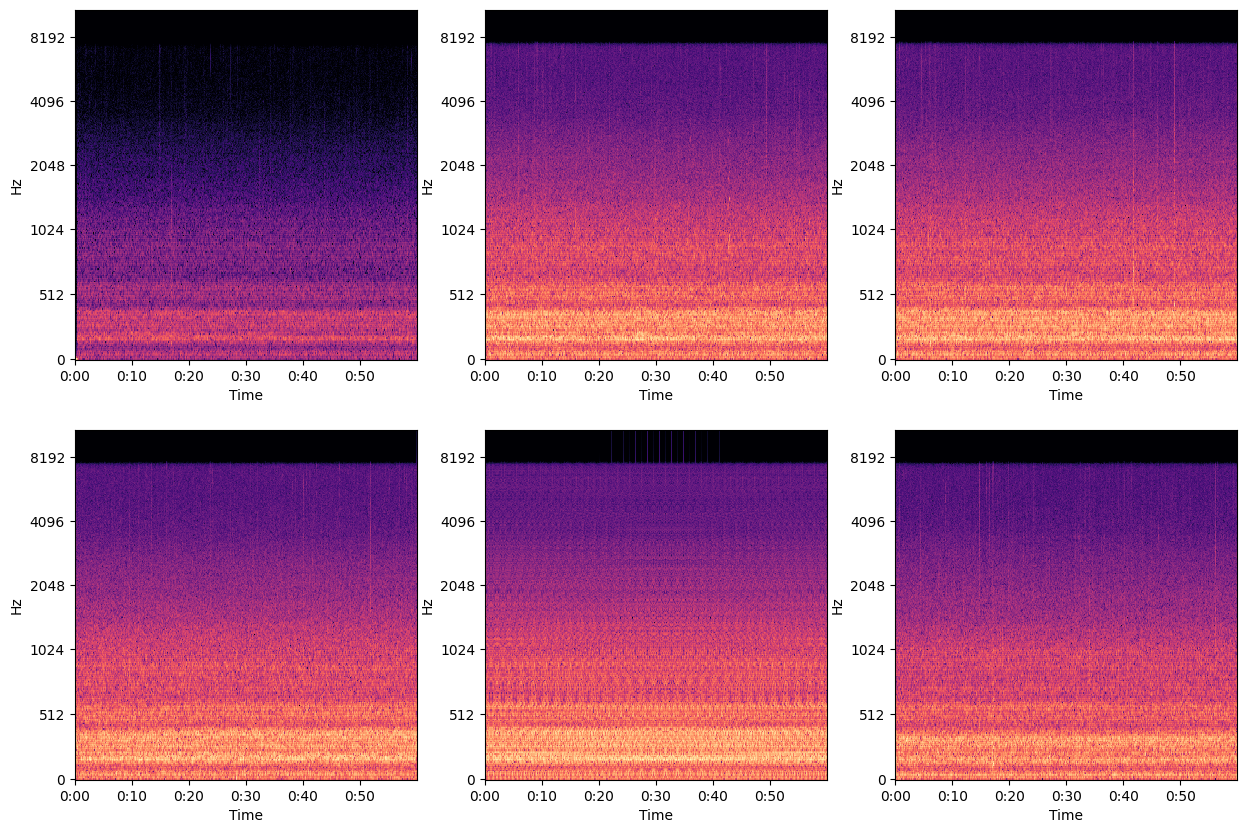

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i in range(2):
    for j in range(3):
        y = sample_audio_files[i*3+j]['y']
        sr = sample_audio_files[i*3+j]['sr']

        melsp = librosa.feature.melspectrogram(
            y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=512, fmax=int(sr/2))
        melsp = librosa.power_to_db(melsp, ref=np.max)
        librosa.display.specshow(melsp, x_axis='time', y_axis='mel', ax=ax[i, j], sr=sr, hop_length=256, fmax=int(sr/2))

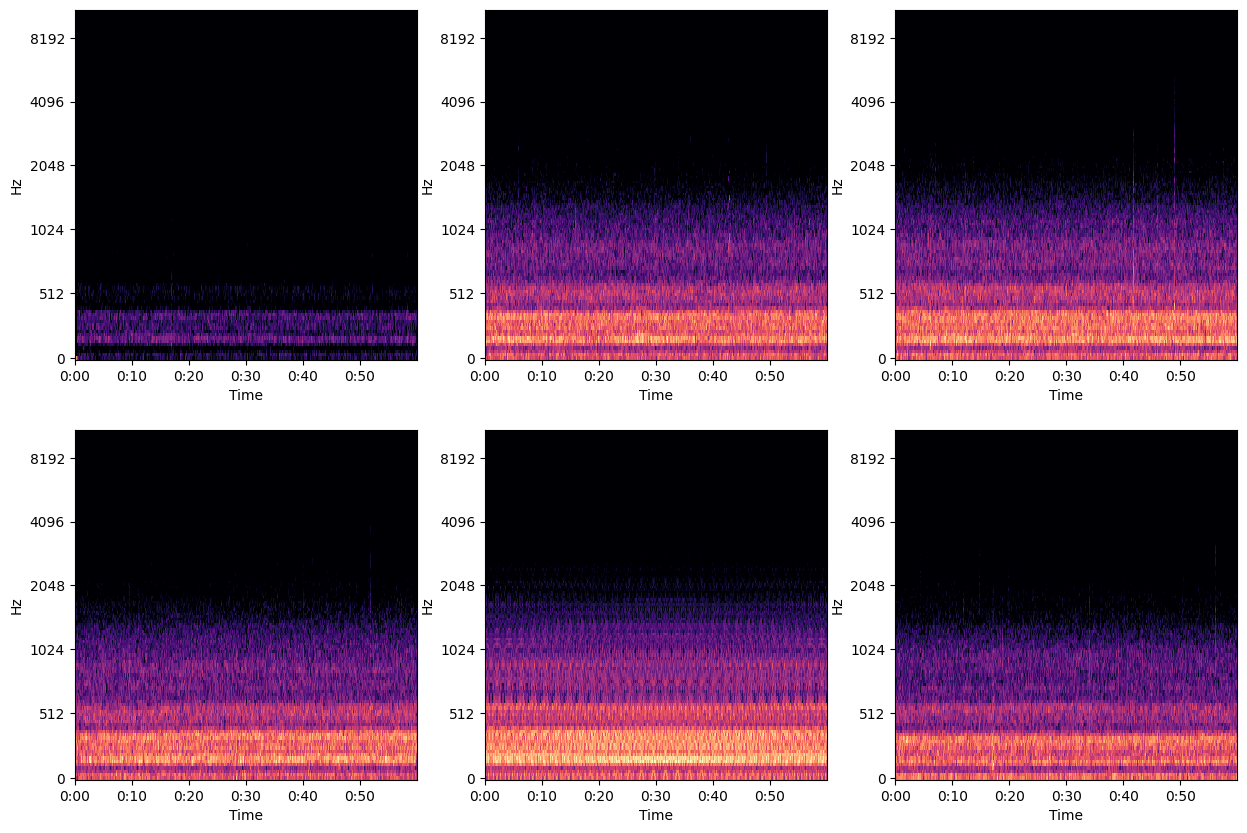

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i in range(2):
    for j in range(3):
        y = sample_audio_files[i*3+j]['y']
        sr = sample_audio_files[i*3+j]['sr']

        melsp = librosa.feature.melspectrogram(
            y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=128, fmax=int(sr/2))
        melsp = librosa.amplitude_to_db(melsp, ref=np.max)
        melsp = librosa.util.normalize(melsp)
        librosa.display.specshow(melsp, x_axis='time', y_axis='mel', ax=ax[i, j], sr=sr, hop_length=256, fmax=int(sr/2))

In [12]:
import gc

def create_spectrogram(audio_data, sample_rate, image_filename):
    fig, ax = plt.subplots(1, 1, figsize=(7.50, 3.50))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # 3150 Hz (int(sample_rate/7)) is set as the max frequency for the spectrogram
    ms = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=2048, hop_length=256, n_mels=128, fmax=int(sample_rate/7))
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.util.normalize(log_ms)
    # librosa.display.specshow(log_ms, sr=sample_rate)

    fig.savefig(image_filename)
    plt.close(fig)
    del fig, ax, ms, log_ms
    gc.collect()

In [13]:
import os
import gc

# src_path: path to the directory containing the audio files
# target_path: path to the directory where the spectrograms will be saved
# batch_size: number of audio files to process at once
# limit: number of audio files to process, None if all files should be processed
def compute_melspectrogram(src_path, target_path, batch_size=50, offset=0, limit=None):
    audio_files = librosa.util.find_files(src_path)

    if offset > 0:
        print(f"Skipping {offset} files.")

    for i in range(offset, len(audio_files), batch_size):
        for j in range(i, min(i+batch_size, len(audio_files))):
            if j == limit:
                return

            audio_time_series, sample_rate = librosa.load(audio_files[j])

            # Retrieve the filename without the path
            basename = os.path.basename(audio_files[j])
            # Remove the extension
            target_filename = os.path.splitext(basename)[0]

            target_filename_with_path = os.path.join(target_path, target_filename + ".png")
            if os.path.exists(target_filename_with_path):
                print(f"Skip file {target_filename} (file {j}/{len(audio_files)}): Already exists in the target path.")
                continue

            create_spectrogram(audio_time_series, sample_rate, target_filename_with_path)
            print(f"Created spectogram for {target_filename} (file {j}/{len(audio_files)}).")

        print(f"--- Checkpoint: Processed {min(i+batch_size, len(audio_files))} files. ---")
        del audio_time_series
        gc.collect()
        
    print("--- SUCCESS: All files processed. ---")


In [21]:
compute_melspectrogram(src_path="../data/raw", target_path="../data/external/", batch_size=100, limit=6)

Created spectogram for 2022-06-05--17-41-01_2__segment0 (file 0/13).
Created spectogram for 2022-06-05--17-41-01_2__segment1 (file 1/13).
Created spectogram for 2022-06-05--17-41-01_2__segment2 (file 2/13).
Created spectogram for 2022-06-05--17-41-01_2__segment3 (file 3/13).
Created spectogram for 2022-06-05--17-41-01_2__segment5 (file 4/13).
Created spectogram for 2022-06-05--18-40-08_2__segment4 (file 5/13).


In [1]:
import features as features

# Pack audio files to HDF5 file
audio_files_path = './data/raw'
hdf5_file_path = './data/interim'
features.compute_melspectrogram(src_path=audio_files_path, target_path=hdf5_file_path)

ModuleNotFoundError: No module named 'features'

## CNN Training

In [46]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append("D:\\Software-Projekte\\Uni\\ds_audio\\src\\")
import config

metadata_column_names = ['device', 'hive number', 'date', 'hive temp', 'hive humidity',
'hive pressure', 'weather temp', 'weather humidity', 'weather pressure',
'wind speed', 'gust speed', 'weatherID', 'cloud coverage', 'rain',
'lat', 'long', 'file name', 'queen presence', 'queen acceptance',
'frames', 'target', 'time', 'queen status']

metadata = np.load(os.path.join(config.TARGET_DIR, "bee_hive_metadata.npy"), allow_pickle=True)
metadata_df = pd.DataFrame(metadata, columns=metadata_column_names)
mel_specs = np.load(os.path.join(config.TARGET_DIR, "bee_hive_mel_specs.npy"), allow_pickle=True)

In [47]:
mel_specs.shape

(6, 128, 5168)

In [48]:
metadata_df.shape

(6, 23)

In [49]:
metadata_df.head()

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,...,rain,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status
0,2,3,2022-06-05 18:40:08,28.14,44.7,1007.48,23.02,71,1013,7.2,...,0,37.29,-121.95,2022-06-05--18-40-08_2__segment4.wav,1,2,10,5,0.75,0
1,2,3,2022-06-06 17:22:09,27.22,32.43,1007.19,24.65,40,1013,6.69,...,0,37.29,-121.95,2022-06-06--17-22-09_2__segment5.wav,1,2,10,5,0.708,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,...,0,37.29,-121.95,2022-06-08--17-21-53_1__segment2.wav,0,0,8,1,0.708,1
3,1,5,2022-06-11 3:36:48,20.71,62.03,1008.18,17.32,75,1014,0.45,...,0,37.29,-121.95,2022-06-11--03-36-48_1__segment3.wav,1,1,8,2,0.125,2
4,2,1,2022-06-15 5:32:54,18.69,26.58,1006.34,13.07,77,1012,2.06,...,0,37.29,-121.95,2022-06-15--05-32-54_2__segment5.wav,1,2,10,5,0.208,0


In [50]:
mel_specs[0]

array([[-14.650564 , -11.130334 ,  -9.769884 , ..., -10.881484 ,
        -13.580634 , -18.988308 ],
       [-16.603086 , -11.1027975,  -8.409389 , ..., -11.781387 ,
        -13.78558  , -16.815134 ],
       [-18.242697 , -17.73763  , -19.80516  , ..., -24.164474 ,
        -25.998352 , -25.147943 ],
       ...,
       [-60.274067 , -61.660206 , -66.32065  , ..., -80.       ,
        -80.       , -77.365746 ],
       [-60.35516  , -61.741177 , -66.40144  , ..., -80.       ,
        -80.       , -77.48827  ],
       [-60.409184 , -61.795124 , -66.455284 , ..., -80.       ,
        -80.       , -77.56756  ]], dtype=float32)

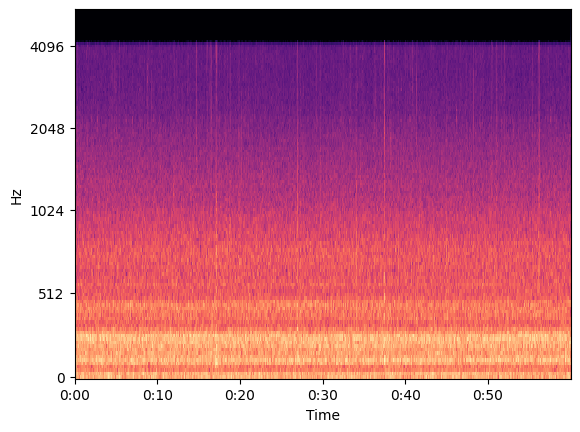

In [51]:
import librosa.display

librosa.display.specshow(mel_specs[0], x_axis='time', y_axis='mel', hop_length=256, fmax=11025/2)